In [28]:
%pip install kagglehub
%pip install --upgrade jupyter ipywidgets
%pip install pandas
%pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\matej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\matej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\matej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: C:\Users\matej\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kaggle/us-baby-names")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2


# Exploring the dataset

## Frequency of names over the years

In [10]:
def plot_name_occurance_change_over_time(name, dataset, state):
    """
    This function plots a histogram of occurances of a selected name from a selected dataset over the years of monitoring.
    It has 3 parameters:
    name - defines the name of a baby to monitor, expects a string
    dataset - defines the dataset to scan through, expected input is a string either 'National' or 'State'
    state - relevant only if dataset = 'State' and only if we want to monitor name occurances restricted to a single state.
            It expects a string input of the state abbreviation. Here is the list of all possible inputs:
            AK, AL, AR, AZ, CA, CO, CT, DC, DE, FL, GA, HI, IA, ID, IL, IN, KS, KY, LA, MA, MD, ME, MI, MN, MO, MS, MT,
            NC, ND, NE, NH, NJ, NM, NV, NY, OH, OK, OR, PA, RI, SC, SD, TN, TX, UT, VA, VT, WA, WI, WV, WY.
            Or a None input if we do not want to narrow the statistics for a single state.
    """
    file_path_NationalNames = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
    df_NationalNames = pd.read_csv(file_path_NationalNames)

    file_path_StateNames = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"
    df_StateNames = pd.read_csv(file_path_StateNames)

    plt.figure(figsize=(10, 6))

    if dataset == 'National':
        name_occurances = df_NationalNames[df_NationalNames["Name"] == name] # selecting all occurances of the chosen name
        name_count_per_year = name_occurances.groupby("Year")["Count"].sum() # counting for each year how many times the chosen name was given to a baby
        plt.title('Occurrences of the name %s over the years' % (name), fontsize=14)


    if dataset == 'State':
        if state is None:
            name_occurances = df_StateNames[df_StateNames["Name"] == name] # selecting all occurances of the chosen name
            name_count_per_year = name_occurances.groupby("Year")["Count"].sum() # counting for each year how many times the chosen name was given to a baby
            plt.title('Occurrences of the name %s over the years' % (name), fontsize=14)

        if state != None:    
            name_occurances = df_StateNames[(df_StateNames["Name"] == name) & (df_StateNames["State"] == state)] # selecting all occurances of the chosen name in the chosen state
            name_count_per_year = name_occurances.groupby("Year")["Count"].sum() # counting for each year how many times the chosen name in the chosen state was given to a baby
            plt.title('Occurrences of the name %s over the years in the state %s' % (name, state), fontsize=14)

    
    plt.bar(name_count_per_year.index, name_count_per_year.values, color='yellow', edgecolor='black')
    plt.xlabel('Year', fontsize=12)
    plt.ylabel('Number of Occurrences', fontsize=12)
    plt.xticks(ticks=range(min(name_count_per_year.index), max(name_count_per_year.index)+1, 10), rotation=45) # X-axis showing years per decade, rotated by 45 degrees
    # it starts either at the first year of the national dataset, 1880 or the first year of the state dataset, which is 1920
    plt.tight_layout()
    plt.show()

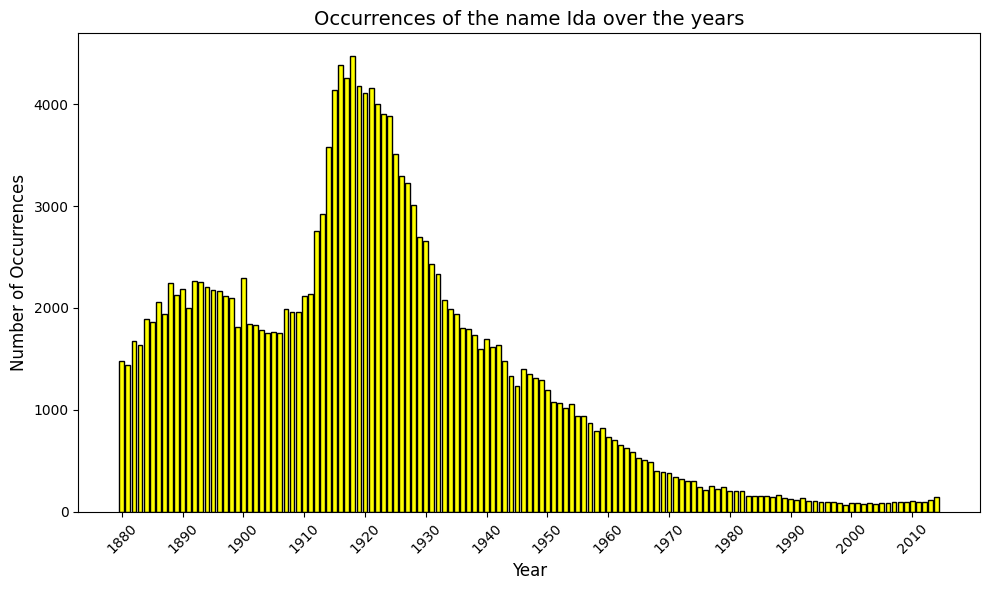

In [9]:
plot_name_occurance_change_over_time(name = 'Ida', dataset = 'National', state = None)

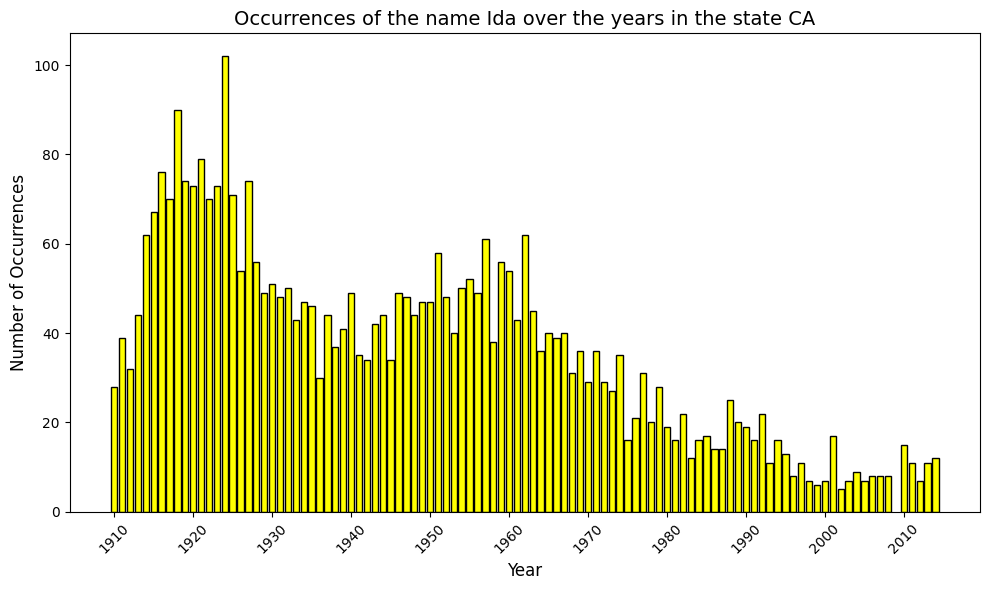

In [11]:
plot_name_occurance_change_over_time(name = 'Ida', dataset = 'State', state = 'CA')

## What name is the most Unisex?

In [13]:
file_path_NationalNames = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\NationalNames.csv"
df_NationalNames = pd.read_csv(file_path_NationalNames)

file_path_StateNames = r"C:\Users\matej\.cache\kagglehub\datasets\kaggle\us-baby-names\versions\2\StateNames.csv"
df_StateNames = pd.read_csv(file_path_StateNames)

In [14]:
# Group by Name and Gender, then sum occurrences
name_gender_counts = df_NationalNames.groupby(["Name", "Gender"])["Count"].sum().unstack(fill_value=0)

# Calculate absolute difference between male and female counts
name_gender_counts["Difference"] = abs(name_gender_counts["M"] - name_gender_counts["F"])

# Find the most unisex name (name with smallest difference)
most_unisex_name = name_gender_counts.sort_values("Difference").head(1)

# Display result
print(most_unisex_name)

Gender  F  M  Difference
Name                    
Elyah   5  5           0


In [15]:
# Get unique male names
unique_male_names = df_NationalNames[df_NationalNames["Gender"] == "M"]["Name"].unique().tolist()

# Get unique female names
unique_female_names = df_NationalNames[df_NationalNames["Gender"] == "F"]["Name"].unique().tolist()

#unisex_names = list(unique_male_names & unique_female_names)  # Intersection of sets

In [16]:
# Get unique male names
unique_male_names = set(df_NationalNames[df_NationalNames["Gender"] == "M"]["Name"].unique())

# Get unique female names
unique_female_names = set(df_NationalNames[df_NationalNames["Gender"] == "F"]["Name"].unique())

# Find names that appear in both lists (unisex names)
unisex_names = list(unique_male_names & unique_female_names)  # Intersection of sets

In [17]:
unisex_names

['Ronel',
 'Kaede',
 'Cailen',
 'Yarrow',
 'Kimber',
 'Zacaria',
 'Nichelle',
 'Teghan',
 'Roshaun',
 'Jacari',
 'Zackery',
 'Romie',
 'Quincey',
 'Gabrieal',
 'Jaque',
 'Nelda',
 'Zaryn',
 'Nylan',
 'Luz',
 'Gurkirat',
 'Esther',
 'Noa',
 'Jermani',
 'Shadie',
 'Gerry',
 'Karlen',
 'Rune',
 'Riki',
 'Masen',
 'Amal',
 'Callan',
 'Elysia',
 'August',
 'Martine',
 'Kadance',
 'Kemoni',
 'Adrean',
 'Haven',
 'Laurence',
 'Ecko',
 'Israel',
 'Marvel',
 'Tagan',
 'Raymie',
 'Lizzie',
 'Gentry',
 'Damie',
 'Thien',
 'Willa',
 'Darryan',
 'Bless',
 'Kartier',
 'Kionne',
 'Laurice',
 'Ruey',
 'Gwin',
 'Tris',
 'Valen',
 'Ryver',
 'Kevan',
 'Amyre',
 'Emrey',
 'Lejeune',
 'Jrue',
 'Ciel',
 'Carsen',
 'Oris',
 'Shiya',
 'Ehrin',
 'Kyndel',
 'Savannah',
 'Ovie',
 'Mirza',
 'Daylyn',
 'Vondell',
 'Dannye',
 'Jessel',
 'Alexa',
 'Kayo',
 'Lal',
 'Trae',
 'Eurie',
 'Lenard',
 'Corrie',
 'Mays',
 'Denell',
 'Leslee',
 'Noel',
 'Noor',
 'Mannie',
 'Kealoha',
 'Meena',
 'Burton',
 'Amauri',
 'Shanice'

In [18]:
# Group by Name and Gender, then sum occurrences
name_gender_counts = df_NationalNames.groupby(["Name", "Gender"])["Count"].sum().unstack(fill_value=0)

# Compute total occurrences (Male + Female)
name_gender_counts["Total"] = name_gender_counts["M"] + name_gender_counts["F"]

# Compute absolute difference between male and female counts
name_gender_counts["Difference"] = abs(name_gender_counts["M"] - name_gender_counts["F"])

# Filter only names that appear in both M and F categories (unisex names)
unisex_names_stats = name_gender_counts[(name_gender_counts["M"] > 0) & (name_gender_counts["F"] > 0)]

# Sort by absolute difference (smallest difference = most unisex)
sorted_unisex_names = unisex_names_stats.sort_values("Difference")

# Display the top 10 most unisex names (optional)
print(sorted_unisex_names.head(20))

Gender     F   M  Total  Difference
Name                               
Camlin     5   5     10           0
Elyah      5   5     10           0
Elmi       5   5     10           0
Cappy      5   5     10           0
Rochon     5   5     10           0
Shinobu    5   5     10           0
Shing      5   5     10           0
Shondel   24  24     48           0
Adeyinka   5   5     10           0
Adason     5   5     10           0
Abiyah     5   5     10           0
Amarey     5   5     10           0
Joyden     5   5     10           0
Amarin     5   5     10           0
Shaquane   5   5     10           0
Ammer      5   5     10           0
Yahav      5   5     10           0
Medley     5   5     10           0
Meco      43  43     86           0
Wilmeth    5   5     10           0


In [19]:
# Sort by Difference (ascending) first, then by Total (descending)
sorted_unisex_names = unisex_names_stats.sort_values(by=["Difference", "Total"], ascending=[True, False])

# Display the top 10 most unisex names (optional)
print(sorted_unisex_names.head(10))

Gender    F   M  Total  Difference
Name                              
Tkai     72  72    144           0
Meco     43  43     86           0
Najay    26  26     52           0
Shondel  24  24     48           0
Jacyn    23  23     46           0
Kanari   23  23     46           0
Annas    22  22     44           0
Nellis   18  18     36           0
Tobbie   17  17     34           0
Georgy   15  15     30           0


In [20]:
# Define the difference you want to filter
specific_difference = 1  # Change this to the difference you need

# Subset of names with the specified difference
subset_names = sorted_unisex_names[sorted_unisex_names["Difference"] == specific_difference]

# Display the subset
print(subset_names)

Gender     F    M  Total  Difference
Name                                
Laray    361  362    723           1
Skyeler  116  115    231           1
Aimar    114  115    229           1
Vail      73   72    145           1
Ronne     68   67    135           1
...      ...  ...    ...         ...
Tijay      5    6     11           1
Tippy      6    5     11           1
Tuong      5    6     11           1
Valdean    5    6     11           1
Yinessa    6    5     11           1

[109 rows x 4 columns]


In [21]:
#list(subset_names["F"])

print (subset_names.iloc[50, 2] / (subset_names.iloc[50, 2] - subset_names.iloc[50, 3]))

print (subset_names.iloc[50, 2])
print (subset_names.iloc[50, 3])

1.05
21
1


In [23]:
for specific_difference in range(20):
    if specific_difference == 0:
        subset_names = sorted_unisex_names[sorted_unisex_names["Difference"] == specific_difference]
        subset_large_occurrence = subset_names[subset_names['Total'] > 100]
        merged_subset = subset_large_occurrence
    
    if specific_difference != 0:
        subset_names = sorted_unisex_names[sorted_unisex_names["Difference"] == specific_difference]
        subset_large_occurrence = subset_names[subset_names['Total'] > 100]
        merged_subset = pd.concat([merged_subset, subset_large_occurrence], axis=0)

In [24]:
merged_subset

Gender,F,M,Total,Difference
Name,,,,
Tkai,72,72,144,0
Laray,361,362,723,1
Skyeler,116,115,231,1
Aimar,114,115,229,1
Vail,73,72,145,1
...,...,...,...,...
Paiden,91,72,163,19
Sayre,62,81,143,19
Brighten,56,75,131,19


In [25]:
# Sort the merged subset by the 'Total' column in descending order
merged_subset_sorted = merged_subset.sort_values(by='Total', ascending=False)

# Display the sorted merged subset
print(merged_subset_sorted)

Gender           F     M  Total  Difference
Name                                       
Krishna       1713  1715   3428           2
Shaya          727   745   1472          18
Lian           684   671   1355          13
Han            501   499   1000           2
Hillery        495   501    996           6
...            ...   ...    ...         ...
Kosisochukwu    59    46    105          13
Algia           46    58    104          12
Maycen          47    57    104          10
Samauri         58    45    103          13
Kolbee          47    54    101           7

[152 rows x 4 columns]


# End of Unisex Coding


In [26]:
import random

def get_random_names_by_difference(specific_difference, sorted_unisex_names):
    # Subset of names with the specified difference
    subset_names = sorted_unisex_names[sorted_unisex_names["Difference"] == specific_difference]

    # Get top 5 names sorted by total occurrences
    top_5_names = subset_names.sort_values(by="Total", ascending=False).head(5)
    
    # Pick a random name from the top 5 names
    random_top_5_name = random.choice(top_5_names.index.tolist())
    
    # Calculate the threshold for the lowest 10% of occurrences
    total_names = len(subset_names)
    lowest_10_percent_threshold = int(total_names * 0.1)
    
    # Sort by total occurrences in ascending order to pick the lowest occurrences
    sorted_by_total_asc = subset_names.sort_values(by="Total", ascending=True)
    
    # Get the lowest 10% of names (based on total occurrences)
    lowest_10_percent_names = sorted_by_total_asc.head(lowest_10_percent_threshold)
    print ('len(lowest_10_percent_names) = ', len(lowest_10_percent_names))
    
    if lowest_10_percent_names.empty:
        random_low_occurrence_name = "No names in the lowest 10% of occurrences"
    else:
        # Pick a random name from the lowest 10% of names
        random_low_occurrence_name = random.choice(lowest_10_percent_names.index.tolist())

    return random_top_5_name, random_low_occurrence_name


# Example usage
specific_difference = 0  # Change this to the difference you need
random_top_5, random_low_occurrence = get_random_names_by_difference(specific_difference, sorted_unisex_names)

print(f"Random top 5 name: {random_top_5}")
print(f"Random low occurrence name (from lowest 10%): {random_low_occurrence}")

len(lowest_10_percent_names) =  11
Random top 5 name: Meco
Random low occurrence name (from lowest 10%): Jeel


In [27]:
# Calculate the total occurrences by summing male and female counts
sorted_unisex_names['Total'] = sorted_unisex_names['M'] + sorted_unisex_names['F']

# Sort the dataset by total occurrences in descending order
sorted_by_total_occurrences = sorted_unisex_names.sort_values(by="Total", ascending=False)

# Select relevant columns (Gender counts, Total, Difference)
sorted_by_total_occurrences = sorted_by_total_occurrences[["M", "F", "Total", "Difference"]]

# Display the result
print(sorted_by_total_occurrences)

Gender         M        F    Total  Difference
Name                                          
James    5105919    23177  5129096     5082742
John     5084943    21647  5106590     5063296
Robert   4796695    20090  4816785     4776605
Michael  4309198    21607  4330805     4287591
Mary       15159  4115282  4130441     4100123
...          ...      ...      ...         ...
Asil           5        5       10           0
Ayele          5        5       10           0
Murtha         5        5       10           0
Nathel         5        5       10           0
Anesti         5        5       10           0

[10221 rows x 4 columns]
